## Personal ML project - Diabetes prediction 

1. Our database: Diabetes 130-US Hospitals for Years 1999-2008
https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

# Number of instances
101766

# Associated Tasks
Classification, Clustering



In [5]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# Download the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Extract the main CSV file
    with z.open('dataset_diabetes/diabetic_data.csv') as f:
        diabetes = pd.read_csv(f)
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Exploring the data 

- Histogram, boxplots and bar charts will be used to analyze the structure of the data 
- Check the feature distribution and evaluate what are the most related with diabetes 
- Check for the categories that posses an specific meaning 

In [ ]:
print(diabetes.shape)
print(diabetes.columns)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [7]:
# Mapping dictionaries for categorical variables

admission_type_id = { 1 : 'Emergency'
, 2 : 'Urgent'
, 3 : 'Elective'
, 4 : 'Newborn'
, 5 : 'Not Available'
, 6 : 'NULL'
, 7 : 'Trauma Center'
, 8 : 'Not Mapped' }

discharge_disposition_id = { 1 : 'Discharged to home'
, 2 : 'Discharged/transferred to another short term hospital'
, 3 : 'Discharged/transferred to SNF'
, 4 : 'Discharged/transferred to ICF'
, 5 : 'Discharged/transferred to another type of inpatient care institution'
, 6 : 'Discharged/transferred to home with home health service'
, 7 : 'Left AMA'
, 8 : 'Discharged/transferred to home under care of Home IV provider'
, 9 : 'Admitted as an inpatient to this hospital'
, 10 : 'Neonate discharged to another hospital for neonatal aftercare'
, 11 : 'Expired'
, 12 : 'Still patient or expected to return for outpatient services'
, 13 : 'Hospice / home'
, 14 : 'Hospice / medical facility'
, 15 : 'Discharged/transferred within this institution to Medicare approved swing bed'
, 16 : 'Discharged/transferred/referred another institution for outpatient services'
, 17 : 'Discharged/transferred/referred to this institution for outpatient services'
, 18 : 'NULL'
, 19 : 'Expired at home. Medicaid only, hospice'
, 20 : 'Expired in a medical facility. Medicaid only, hospice'
, 21 : 'Expired, place unknown. Medicaid only, hospice'
, 22 : 'Discharged/transferred to another rehab fac including rehab units of a hospital'
, 23 : 'Discharged/transferred to a long term care hospital'
, 24 : 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare'
, 25 : 'Not Mapped'
, 26 : 'Unknown/Invalid'
, 30 : 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
, 27 : 'Discharged/transferred to a federal health care facility'
, 28 : 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital'
, 29 : 'Discharged/transferred to a Critical Access Hospital (CAH)' }


admission_source_id = { 1 : 'Physician Referral'
, 2 : 'Clinic Referral'
, 3 : 'HMO Referral'
, 4 : 'Transfer from a hospital'
, 5 : 'Transfer from a Skilled Nursing Facility (SNF)'
, 6 : 'Transfer from another health care facility'
, 7 : 'Emergency Room'
, 8 : 'Court/Law Enforcement'
, 9 :  'Not Available'
, 10 : 'Transfer from critial access hospital'
, 11 : 'Normal Delivery'
, 12 : 'Premature Delivery'
, 13 : 'Sick Baby'
, 14 : 'Extramural Birth'
, 15 : 'Not Available'
, 17 : 'NULL'
, 18 : 'Transfer From Another Home Health Agency'
, 19 : 'Readmission to Same Home Health Agency'
, 20 : 'Not Mapped'
, 21 : 'Unknown/Invalid'
, 22 : 'Transfer from hospital inpt/same fac reslt in a sep claim'
, 23 : 'Born inside this hospital'
, 24 : 'Born outside this hospital'
, 25 : 'Transfer from Ambulatory Surgery Center'
, 26 : 'Transfer from Hospice'
}

In [11]:
# Do a train test split of the original training data
from sklearn.model_selection import train_test_split

diabetes_train, diabetes_test = train_test_split(diabetes, test_size=0.2, random_state=42)

print("Train data shape:", diabetes_train.shape)
print("Test data shape:", diabetes_test.shape)

Train data shape: (81412, 50)
Test data shape: (20354, 50)


## We will visualize the distributions and relatioships, rele

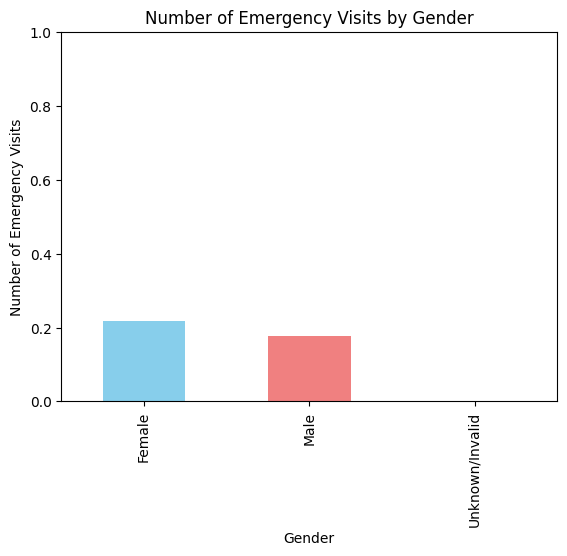

In [19]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


def plot_number_emergency_by_gender(df):
    number_emergency = df.groupby("gender")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Gender")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Gender")
    plt.ylim(0, 1)
    plt.show()

plot_number_emergency_by_gender(diabetes_train)


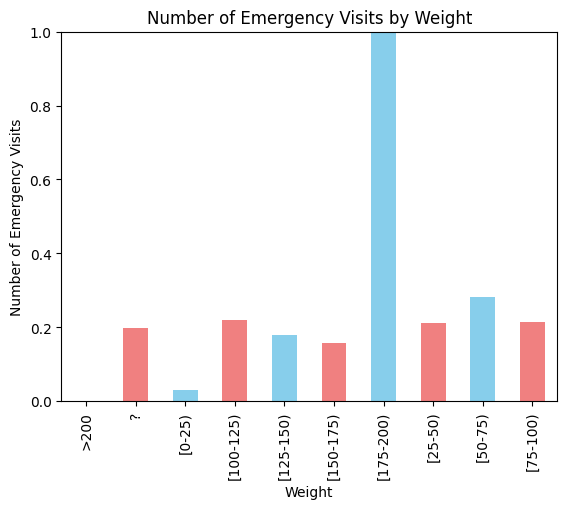

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


def plot_number_emergency_by_weight(df):
    number_emergency = df.groupby("weight")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Weight")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Weight")
    plt.ylim(0, 1)
    plt.show()





plot_number_emergency_by_weight(diabetes_train)

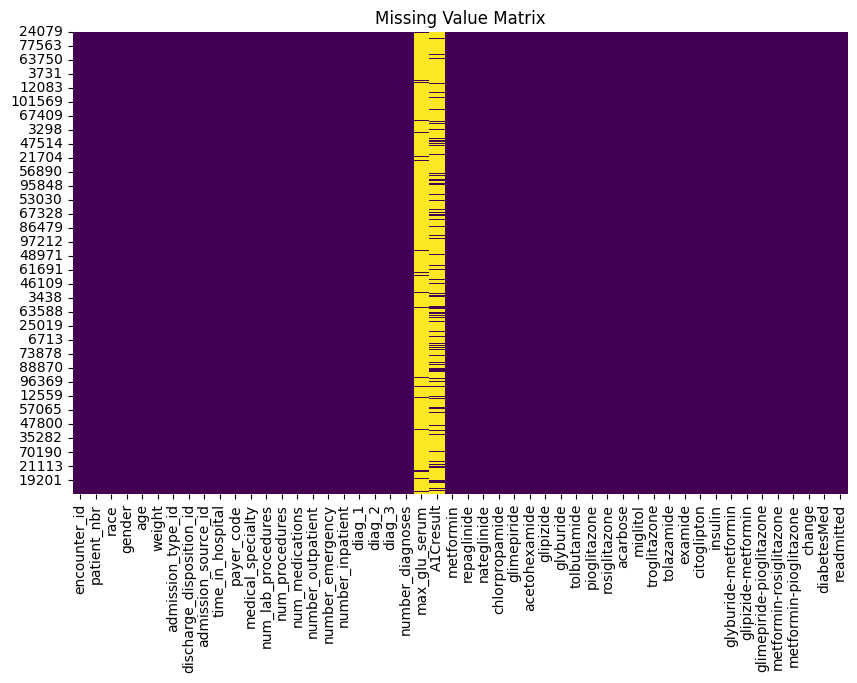

In [21]:
def plot_missing_value_matrix(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Value Matrix")
    plt.show()

plot_missing_value_matrix(diabetes_train)

## Drop 2 of the columns that have missing information for sure 
**Completely excluded them because the missing values are too much **
- max_glu_serum
- A1Cresult

**Excluded because I want to make a basing model first later we can integrate them if the performance of the model is not proper 

- Payer_code
- medical_speciality 
- diag_1, diag_2, diag_3

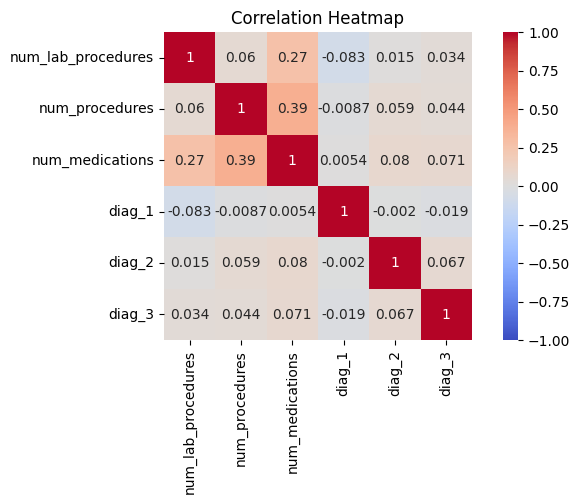

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    # keep only the columns we want, if they exist
    cols = df.columns.intersection(['num_medications', 'num_lab_procedures', 'num_procedures', 'num_diagnoses', 'diag_1', 'diag_2', 'diag_3'])

    # coerce to numeric in case 'age' is stored as strings/bins
    data = df[cols].apply(pd.to_numeric, errors='coerce')

    plt.figure(figsize=(8, 4))  # set size BEFORE plotting
    ax = sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
    ax.set_title("Correlation Heatmap")
    plt.show()

# call
plot_correlation_heatmap(diabetes_train)


In [ ]:
#So from the training data, we can see that the columns 'max_glu_serum', 'A1Cresult', 'Payer_code', 'medical_speciality',
# 'diag_1', 'diag_2', and 'diag_3' have a lot of missing values, so I want to remove them from the training data 

cols_to_drop = ['max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
diabetes_train_clean = diabetes_train.drop(columns=cols_to_drop)
diabetes_train_clean.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
24079,81844290,94788,Caucasian,Female,[70-80),?,1,1,7,4,...,No,No,No,No,No,No,No,No,No,NO
98079,396159158,135023315,Caucasian,Male,[50-60),?,1,1,7,1,...,No,No,No,No,No,No,No,No,No,>30
6237,31258956,18397782,Caucasian,Male,[80-90),?,1,1,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
72208,210691074,67509558,Caucasian,Male,[80-90),?,1,3,7,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
33075,104902980,23272362,AfricanAmerican,Female,[70-80),?,1,11,7,11,...,No,No,No,No,No,No,No,No,No,NO


'/Users/odalys/Git/Diabetes-ML'